In [2]:
import pandas as pd

In [4]:
train = pd.read_csv("/Users/kent/git/courses/python_ML2/session4_kaggle/house_prices_advanced_regression_techniques/train.csv")

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Drop Id
train = train.drop('Id', 1)

In [33]:
# train.drop(['MiscVal'], axis = 1, inplace = True)
#1. Convert NA into 'No' Categorical values
meaningfulNA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
train[meaningfulNA] = train[meaningfulNA].fillna('No')

In [34]:
intVar = train.select_dtypes(include = ['int']).columns.tolist()
floatVar = train.select_dtypes(include = ['float']).columns.tolist()
objectVar = train.select_dtypes(include = ['object']).columns.tolist()


print("intVar =>",intVar,"\n")
print("floatVar =>",floatVar,"\n")
print("objectVar =>",objectVar,"\n")







intVar => ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice'] 

floatVar => ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 

objectVar => ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType'

# 進行資料編碼

In [64]:
cate_data = train[objectVar]
cate_data.values

array([['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ..., 
       ['RL', 'Pave', 'No', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal']], dtype=object)

In [69]:


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_str = cate_data.values.astype(dtype="str")
# transform to integer
X_int = LabelEncoder().fit_transform(X_str.ravel()).reshape(*X_str.shape)
# transform to binary
X_bin = OneHotEncoder().fit_transform(X_int).toarray()



In [72]:
X_cate = X_bin
X_cate

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [89]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X_float = train[floatVar]
X_int = train[intVar[:-1]]

print(X_float.shape)
print(X_int.shape)

(1460, 3)
(1460, 32)


In [113]:
X_real = np.column_stack((X_float,X_int))
X_real = np.nan_to_num(X_real)

X_real_scaled = stds.fit_transform(X_real)
X_real_scaled.shape

(1460, 35)

In [114]:
X_all = np.column_stack((X_real_scaled,X_cate))
X_all.shape

(1460, 302)

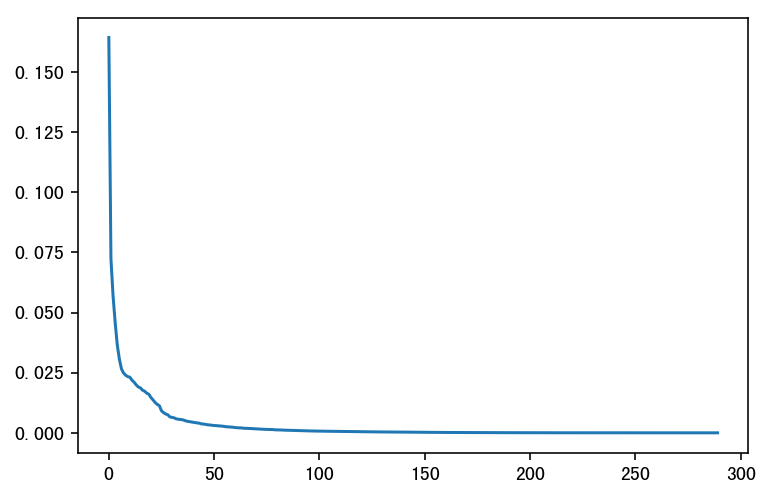

In [150]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=290,whiten=True)
X_train_pca = pca.fit_transform(X_all)

plt.plot(pca.explained_variance_ratio_)


In [151]:
Y = train['SalePrice']

stds_y = StandardScaler()
Y_scaled = stds_y.fit_transform(Y.reshape(-1, 1))
Y_scaled

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ..., 
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [157]:
from sklearn.linear_model import LinearRegression,SGDRegressor,BayesianRidge
from sklearn import metrics
lr = SGDRegressor(loss='squared_loss', 
                  penalty='l1', alpha=0.005, l1_ratio=0.15, 
                  fit_intercept=True, max_iter=None, tol=None, 
                  shuffle=True, verbose=0, epsilon=0.1, random_state=1, learning_rate='invscaling', 
                  eta0=0.01, power_t=0.25, warm_start=False, average=False, n_iter=None)


# lr = BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, 
#                    lambda_2=1e-06, compute_score=False, fit_intercept=True, normalize=True, 
#                    copy_X=True, verbose=False)

lr.fit(X_train_pca[:-100],Y_scaled[:-100])


# 拿 training 直接驗證
predict_y = lr.predict(X_train_pca[-100:])
metrics.mean_absolute_error(Y[-100:],stds_y.inverse_transform(predict_y))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13786.285268885618

In [149]:
test = pd.read_csv("/Users/kent/git/courses/python_ML2/session4_kaggle/house_prices_advanced_regression_techniques/test.csv")

In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [61]:
X_cate = X_bin